<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Prediction du salaire des employes en fonction de l'experience

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/Salary_Data.csv')

In [4]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
# savoir s'il ya des valeurs manquantes

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
#voir la corelation entre ses 2 features

df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


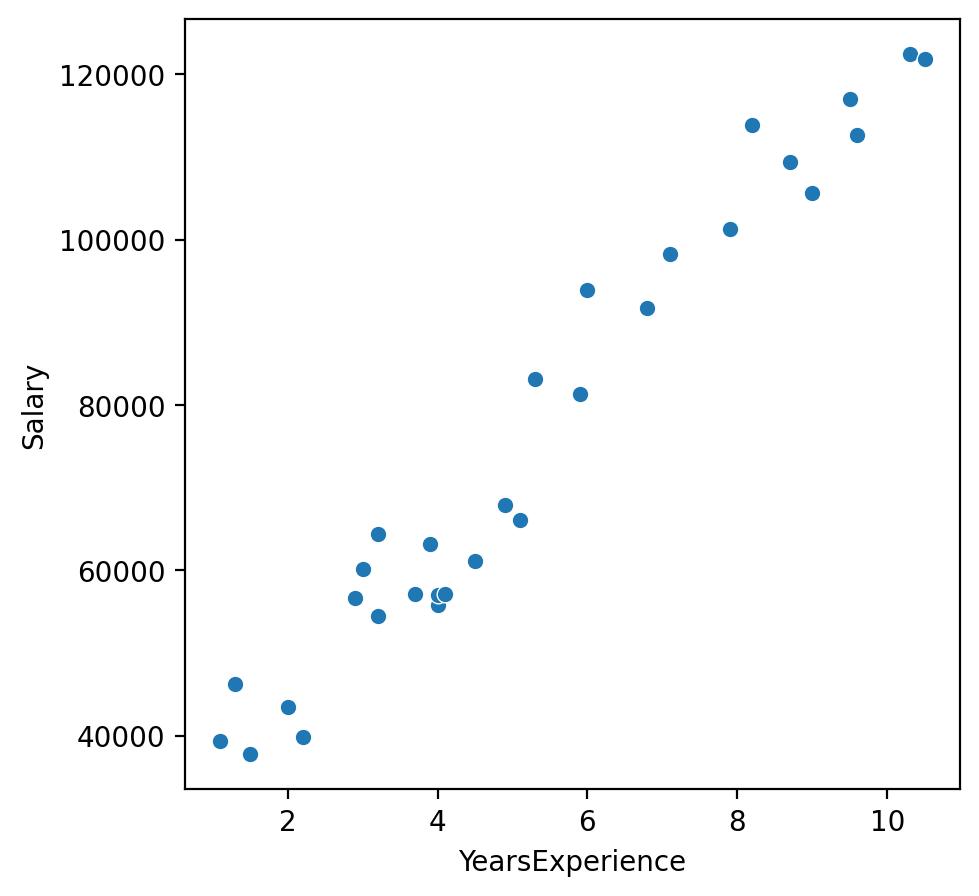

In [8]:
# diagram de

plt.figure(figsize=(5, 5), dpi=200)
sns.scatterplot(df, x='YearsExperience', y='Salary');

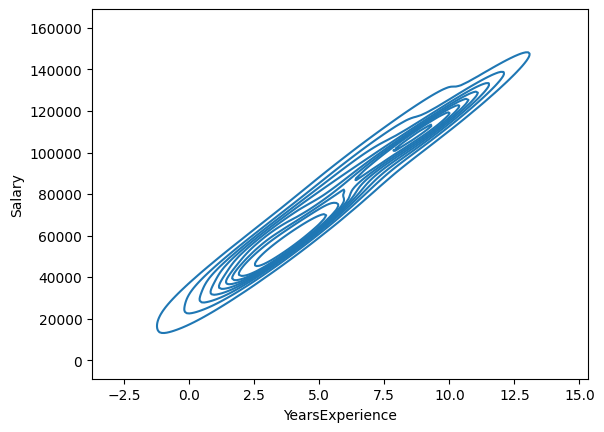

In [9]:
sns.kdeplot(df, x='YearsExperience', y='Salary');

In [10]:
# separtion de donnees en features et en label

X = df.drop('Salary', axis=1)
y = df['Salary']

In [11]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [12]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [13]:
# separation en donnees de train et test set


In [14]:
from sklearn.model_selection import train_test_split



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
# normalisation ou mise a l'echelle

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler() # instanciation du model StandardScaler

In [19]:
# mise a l'echelles  des donnees
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_test = scaler.transform(X_test)

In [20]:
# linearisation
from sklearn.linear_model import LinearRegression

In [21]:
lin_model = LinearRegression()# instanciation de model de LinearRegression

In [22]:
# entrainnement de notre model de regression linaire sur nos donnees d'entrainement mises a l'echelle

lin_model.fit(scaled_X_train, y_train)


LinearRegression()

In [23]:
# retrouver les coefficients et l'ordonnees a l'origine

lin_model.coef_ # coefficcient

array([25140.38349789])

In [24]:
lin_model.intercept_ # ordonnees

71627.0

In [25]:
# predictions de notre donnees

y_pred = lin_model.predict(scaled_X_test)

In [26]:
# mesures de  erreurs

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
MAE = mean_absolute_error(y_test, y_pred)

MAE

3038.6823612518815

In [29]:
MSE = mean_squared_error(y_test, y_pred)

MSE

17978409.497344166

In [30]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

RMSE

4240.095458517905

In [31]:
r = r2_score(y_test, y_pred)
r

0.9746363787521536

In [32]:
# predictions  sur d  nouvelles donnnees

In [33]:
NewData = [[8], [5], [15], [23]]


In [34]:
# construction d'un new dataframe a partir  de NewData

NewTest = pd.DataFrame(NewData, columns=['New Data'])

NewTest

,New Data
0,8
1,5
2,15
3,23


In [35]:
# new prediction  on the new data

y_new_prediction = lin_model.predict(NewTest)

y_new_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([272750.06798313, 197328.91748946, 448732.75246837, 649855.8204515 ])